# In this project,Hourly electrical energy output for combined cycle power plant is being predicted using four parameters.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Numpy is used for scientific calculations.                               
Pandas helps us to perform operations on dataframes(i.e)Tabular data.                          
matplotlib and seaborn are helpful in visualizing the data and getting insights from data.            

### Importing csvfile 

In [2]:
data=pd.read_excel('Folds5x2_pp.xlsx')

## Exploratory Data Analysis

In [3]:
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [4]:
#AT:Ambient Temperature
#V:Exhaust vacuum
#AP:Ambient Pressure
#RH:Relative Humidity
#PE:net hourly electrical energy output(Target variable)

In [5]:
#Ambient temperature:Ambient temperature is the air temperature of an environment or object.In computing, ambient temperature refers to the air temperature surrounding computing equipment.   
#Ambient pressure:.Ambient pressure is also called as Atmospheric pressure.Atmospheric pressure (Pa) is the pressure due to the force by the atmosphere mass.


In [6]:
data.shape

(9568, 5)

In [7]:
#Here we are having 9568 observations and 5 attributes

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
AT    9568 non-null float64
V     9568 non-null float64
AP    9568 non-null float64
RH    9568 non-null float64
PE    9568 non-null float64
dtypes: float64(5)
memory usage: 373.9 KB


In [9]:
#Here all the variables are continous(i.e) float64  

In [10]:
data.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [11]:
data.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

#No,Null values in the dataset

### Uni-Variant analysis:

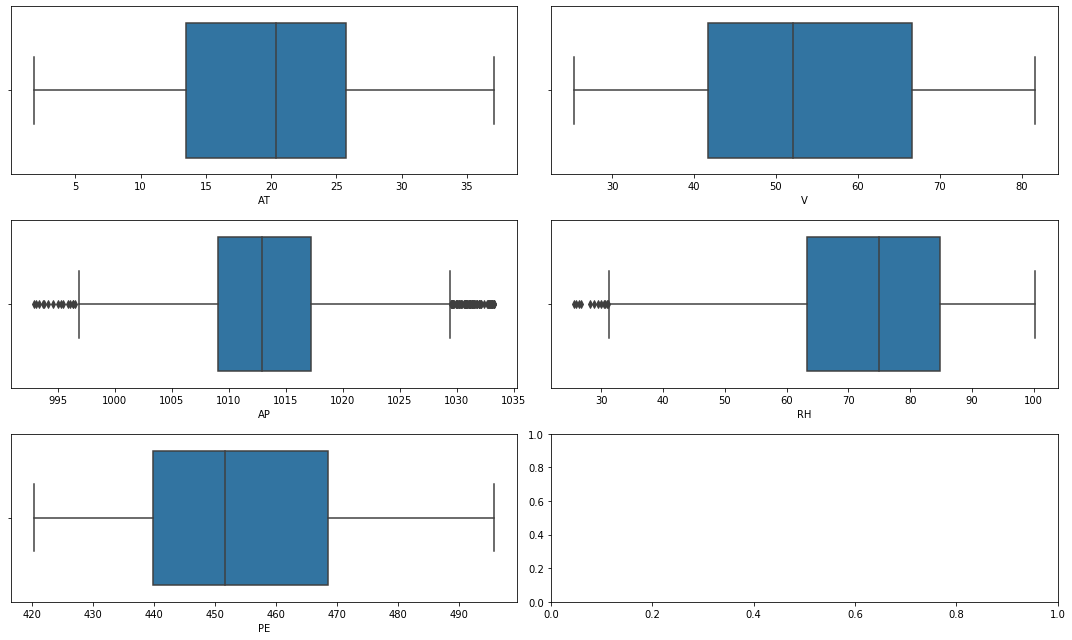

In [12]:
fig,ax = plt.subplots(3,2,figsize=(15,9))
ax = ax.flatten()
for i, column in enumerate(data.columns[:8]):
    sns.boxplot(data[column], ax=ax[i])
    
plt.tight_layout()
plt.show()

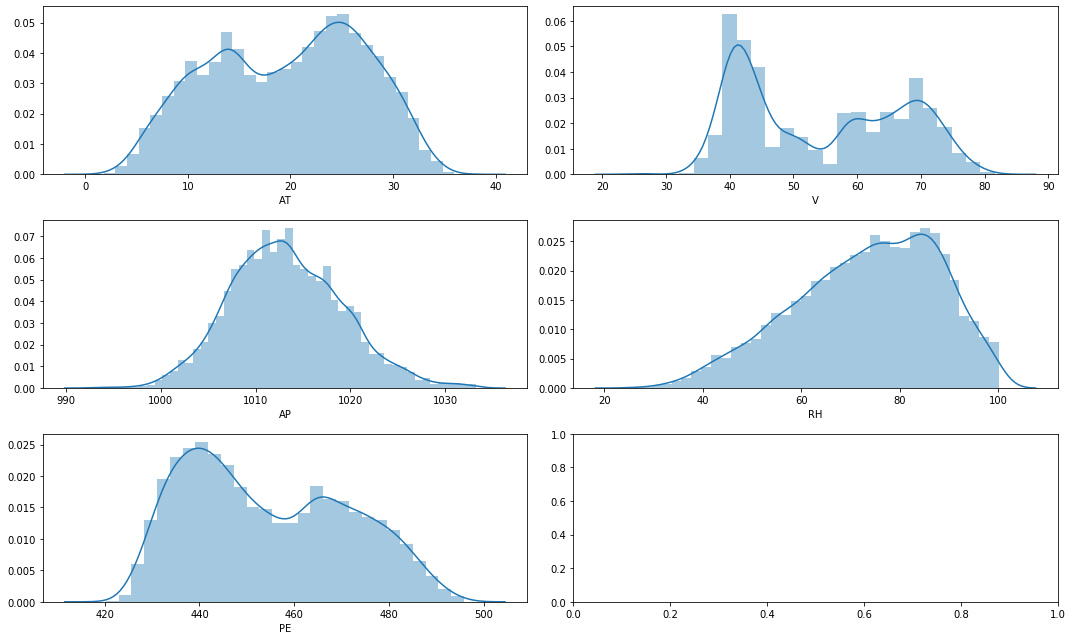

In [13]:
fig,ax = plt.subplots(3,2,figsize=(15,9))
ax = ax.flatten()
for i, column in enumerate(data.columns[:8]):
    sns.distplot(data[column], ax=ax[i])
    
plt.tight_layout()
plt.show()

### Bi-variate analysis

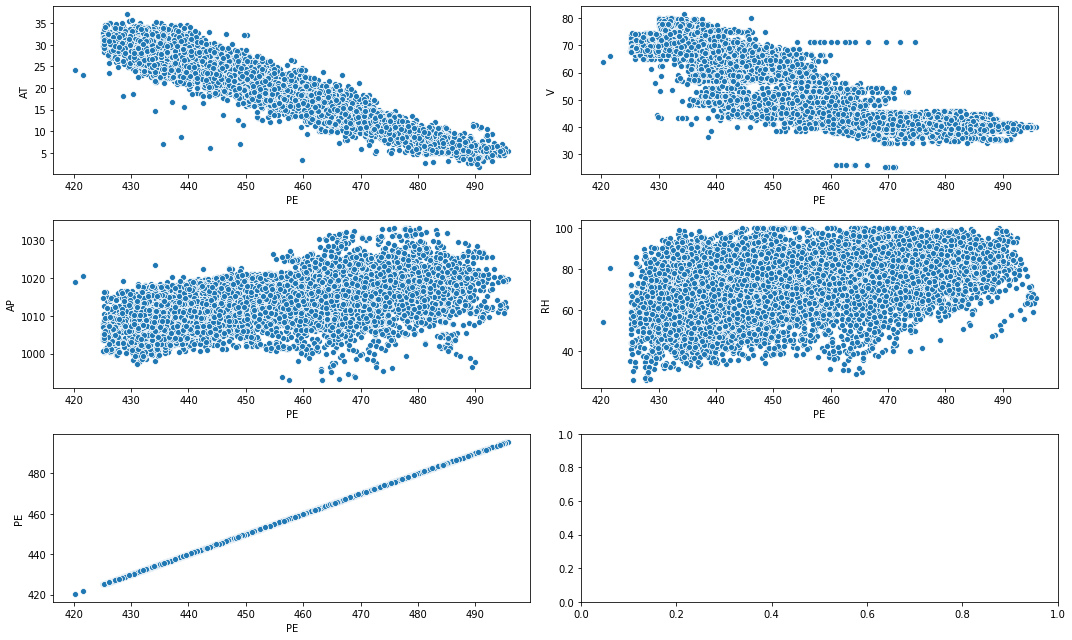

In [14]:
fig,ax = plt.subplots(3,2,figsize=(15,9))
ax = ax.flatten()
for i, column in enumerate(data.columns[:8]):
    sns.scatterplot(data['PE'],data[column], ax=ax[i])
    
plt.tight_layout()
plt.show()

In [15]:
#pairplot

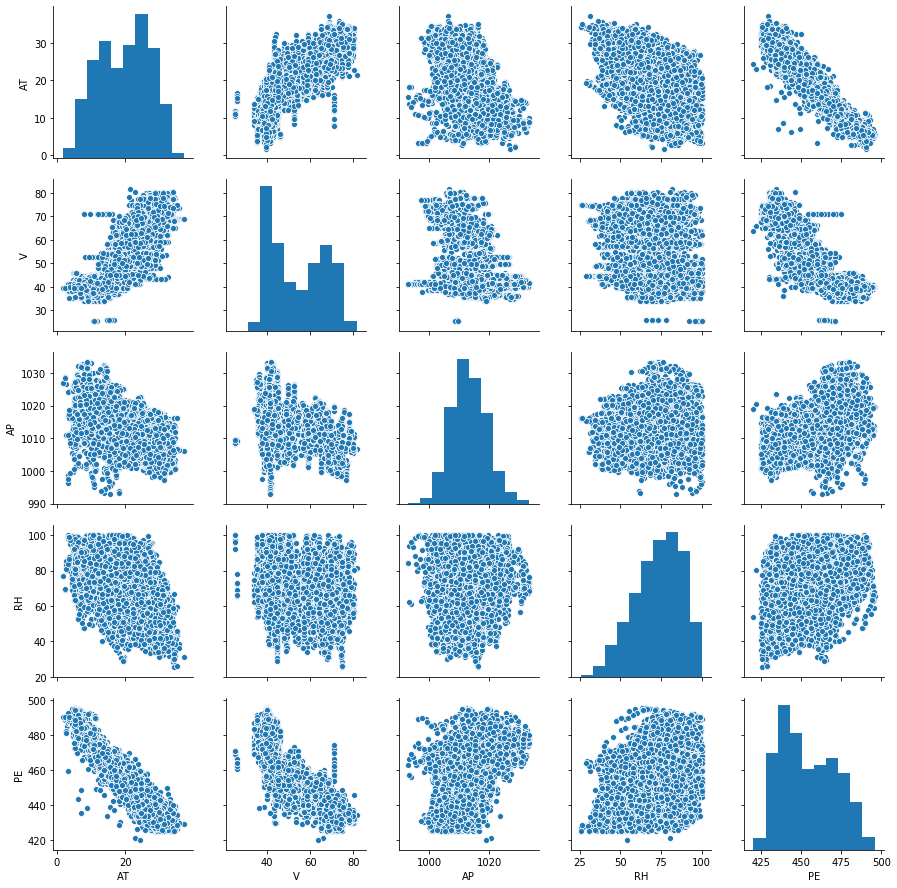

In [16]:
sns.pairplot(data)

In [17]:
#correlation plot

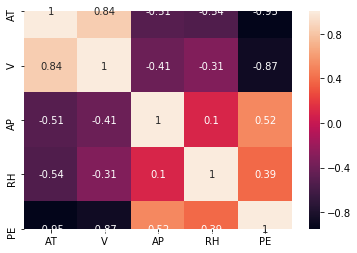

In [18]:
sns.heatmap(data.corr(),annot=True)

In [19]:
data.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


In [20]:
#As there are only four independent variables there is no need for feature selection here.
#based on correlation we can say that AT is strongly correlated with PE
#RH is weakly correlated with PE

In [21]:
X=data.drop('PE',axis=1)
y=data['PE']

In [22]:
import statsmodels.api as sm
from   statsmodels.formula.api import ols

In [23]:
X_constant=sm.add_constant(X)

C:\Users\hp\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [24]:
lin_reg=sm.OLS(y,X_constant).fit()

In [25]:
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Wed, 18 Dec 2019   Prob (F-statistic):               0.00
Time:                        10:20:26   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.000     435.500     473.718
AT            -1.9775      0.015   -129.342      0.000      -2.007      -1.948
V             -0.2339      0.007    -32.122      0.000      -0.248      -0.220
AP             0.0621      0.009      6.564      0.000       0.044       0.081
RH            -0.1581      0.004    -37.918      0.000      -0.166      -0.150
==============================================================================
Omnibus:                      892.002   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4086.777
Skew:                          -0.352   Prob(JB):                         0.00
Kurtosis:                       6.123   Cond. No.                     2.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
#Here R-squared and Adjusted-R-squared are same means each and every feature is significantly important.
#p-values of all the variables are having p_value less than 0.05.So,all variables are significantly important.

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns)

,vif
AT,5.977602
V,3.943003
AP,1.452639
RH,1.705290


In [28]:
#vif value of all variables are less than 10.

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [31]:
from sklearn.linear_model import LinearRegression 

In [32]:
lr=LinearRegression()

In [33]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
lr.score(X_train,y_train)

0.9291361021558927

In [35]:
lr.score(X_test,y_test)

0.9275484963869202

In [36]:
y_pred_train=lr.predict(X_train)

In [37]:
y_pred_test=lr.predict(X_test)

In [38]:
from sklearn.metrics import r2_score

In [39]:
r2_score(y_pred_train,y_train)

0.9237314127826048

In [40]:
r2_score(y_pred_test,y_test)

0.923965270931186

In [41]:
def model(algo,X_train,X_test,y_train,y_test):
    algo.fit(X_train,y_train)
    y_pred_train=lr.predict(X_train)
    y_pred_test=lr.predict(X_test)
    print('train score for {}'.format(algo))
    print(r2_score(y_pred_train,y_train))
    print('test score for {}'.format(algo))
    print(r2_score(y_pred_test,y_test))
    

In [42]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
model(dt,X_train,X_test,y_train,y_test)

train score for DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
0.9237314127826048
test score for DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
0.923965270931186


In [43]:
import sklearn.model_selection as model_selection
from sklearn.model_selection import KFold,cross_val_score

In [44]:
kfold = model_selection.KFold(shuffle = True,n_splits= 15,random_state=0)
cv_results = model_selection.cross_val_score(lr,X,y,cv = kfold)
print(np.mean(cv_results))
print(np.var(cv_results,ddof=1))

0.9283686638826373
3.0157770209673664e-05


In [45]:
kfold = model_selection.KFold(shuffle = True,n_splits= 15,random_state=0)
cv_results = model_selection.cross_val_score(dt,X,y,cv = kfold)
print(np.mean(cv_results))
print(np.var(cv_results,ddof=1))

0.9303671229003261
0.00011646285283155961


from the above scores we can say that the scores of train and test,scores of cross validation techniques are good.            
This can be explained from  the above scatter plot(i.e) all independent variables are in linear relation with respect to dependent variables